### SALES ANALYSIS 

Step 1: Create a DataFrame from the list of dictionaries below:
    
- [{'product_id':23, 'name':'computer', 'wholesale_price': 500, 'retail_price':1000, 'sales':100},
- {'product_id':96, 'name':'Python Workout', 'wholesale_price': 35,'retail_price':75, 'sales':1000},
- {'product_id':97, 'name':'Pandas Workout', 'wholesale_price': 35, 'retail_price':75, 'sales':500},
- {'product_id':15, 'name':'banana', 'wholesale_price': 0.5,'retail_price':1, 'sales':200},
- {'product_id':87, 'name':'sandwich', 'wholesale_price': 3,'retail_price':5, 'sales':300}]


Step 2: Calculate the Total Profit for each product using the formula

net_revenue_per_product = (retail_price - wholesale price) * sales

Step 3: Determine the following
- How much total net revenue you received from all of these sales?
- What product is product retail price more than twice the wholesale price?
- How much did the store make from food vs. computers vs. books?
- Because your store is doing so well, you're able to negotiate a 30% discount on the wholesale
price of goods. Calculate the new net revenue
- Our local government is thinking about imposing a
sales tax, and is thinking about 15, 20, and 25 percent rates.
- Show how much less you would net with each of these tax amounts by adding columns to the
data frame for current income, as well.

In [81]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [82]:
# Step 1: Create a DataFrame from the list of dictionaries below: 

# List of dictionaries
data = [
    {'Product_id':23, 'Name':'Computer', 'Wholesale_price': 500, 'Retail_price':1000, 'Sales':100},
    {'Product_id':96, 'Name':'Python Workout', 'Wholesale_price': 35,'Retail_price':75, 'Sales':1000},
    {'Product_id':97, 'Name':'Pandas Workout', 'Wholesale_price': 35, 'Retail_price':75, 'Sales':500},
    {'Product_id':15, 'Name':'Banana', 'Wholesale_price': 0.5,'Retail_price':1, 'Sales':200},
    {'Product_id':87, 'Name':'Sandwich', 'Wholesale_price': 3,'Retail_price':5, 'Sales':300}
]

# Displaying DataFrame

df = pd.DataFrame(data)
df

,Product_id,Name,Wholesale_price,Retail_price,Sales
0,23,Computer,500.0,1000,100
1,96,Python Workout,35.0,75,1000
2,97,Pandas Workout,35.0,75,500
3,15,Banana,0.5,1,200
4,87,Sandwich,3.0,5,300


In [83]:
# Step 2: Calculate the Total Profit for each product using the formula

# Calculating net revenue per product
df['Net_Revenue_Per_Product'] = (df['Retail_price'] - df['Wholesale_price']) * df['Sales']

# Print the updated DataFrame
df

,Product_id,Name,Wholesale_price,Retail_price,Sales,Net_Revenue_Per_Product
0,23,Computer,500.0,1000,100,50000.0
1,96,Python Workout,35.0,75,1000,40000.0
2,97,Pandas Workout,35.0,75,500,20000.0
3,15,Banana,0.5,1,200,100.0
4,87,Sandwich,3.0,5,300,600.0


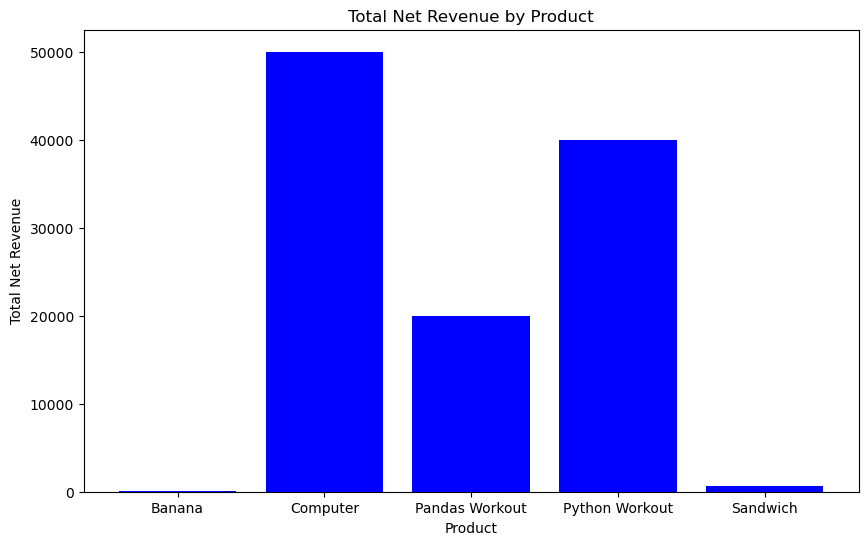

In [84]:
# Visualize Profit for each product
total_revenue_by_product = df.groupby('Name')['Net_Revenue_Per_Product'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(total_revenue_by_product.index, total_revenue_by_product.values, color='blue')

plt.xlabel('Product')
plt.ylabel('Total Net Revenue')
plt.title('Total Net Revenue by Product')
plt.show()

In [86]:
# Step 3.a. How much total net revenue you received from all of these sales?

# Calculating total net revenue
total_net_revenue = df['Net_Revenue_Per_Product'].sum()
print(f'The Total Net Revenue from all sales is {total_net_revenue}.')


The Total Net Revenue from all sales is 110700.0.


In [87]:
# Step 3.b. What product is product retail price more than twice the wholesale price?

# Filtering DataFrame
df_filtered = df[df['Retail_price'] > 2 * df['Wholesale_price']]

# Print filtered DataFrame
print(df_filtered)

df['Price_Ratio'] = df['Retail_price'] / df['Wholesale_price']
product_more_than_twice = df[df['Price_Ratio'] > 2]['Name'].tolist()
print('')
print("Products with Retail Price more than Twice the Wholesale Price:", product_more_than_twice)


   Product_id            Name  Wholesale_price  Retail_price  Sales  \
1          96  Python Workout             35.0            75   1000   
2          97  Pandas Workout             35.0            75    500   

   Net_Revenue_Per_Product  
1                  40000.0  
2                  20000.0  

Products with Retail Price more than Twice the Wholesale Price: ['Python Workout', 'Pandas Workout']


In [88]:
# Step 3.c. How much did the store make from food vs. computers vs. books?

# Define a dictionary to map product names to categories
category_dict = {
    'Computer': 'computers',
    'Python Workout': 'books',
    'Pandas Workout': 'books',
    'Banana': 'food',
    'Sandwich': 'food'
}

# Create a new 'Category' column by mapping the 'Name' column to the category dictionary
df['Category'] = df['Name'].map(category_dict)

df

,Product_id,Name,Wholesale_price,Retail_price,Sales,Net_Revenue_Per_Product,Price_Ratio,Category
0,23,Computer,500.0,1000,100,50000.0,2.000000,computers
1,96,Python Workout,35.0,75,1000,40000.0,2.142857,books
2,97,Pandas Workout,35.0,75,500,20000.0,2.142857,books
3,15,Banana,0.5,1,200,100.0,2.000000,food
4,87,Sandwich,3.0,5,300,600.0,1.666667,food


In [89]:
# Group by category and calculate total net revenue for each
total_revenue_by_category = df.groupby('Category')['Net_Revenue_Per_Product'].sum()

# Print total net revenue for food, computers, and books
print(f"Total net revenue from food sales: {total_revenue_by_category['food']}")
print(f"Total net revenue from computer sales: {total_revenue_by_category['computers']}")
print(f"Total net revenue from book sales: {total_revenue_by_category['books']}")


Total net revenue from food sales: 700.0
Total net revenue from computer sales: 50000.0
Total net revenue from book sales: 60000.0


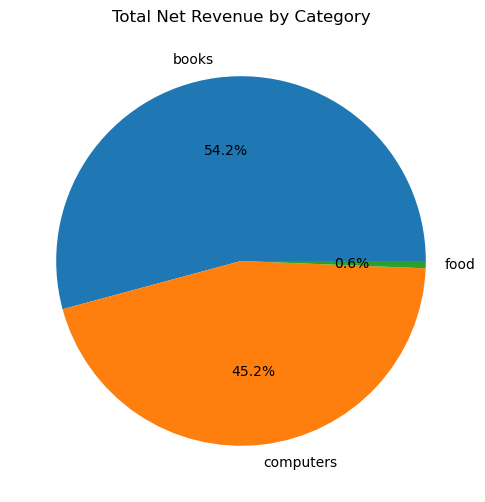

In [90]:
# Visualize how much the store made from food vs. computers vs. books
total_revenue_by_category = df.groupby('Category')['Net_Revenue_Per_Product'].sum()

# Creating a pie chart
plt.figure(figsize=(10, 6))
plt.pie(total_revenue_by_category.values, labels=total_revenue_by_category.index, autopct='%1.1f%%')

plt.title('Total Net Revenue by Category')
plt.show()

In [92]:
# Step 3.d.Because your store is doing so well, you're able to negotiate a 30% discount on the wholesale price of goods. Calculate the new net revenue

# Appling 30% discount on wholesale price
df['Discounted_Wholesale_Price'] = df['Wholesale_price'] * 0.7

# Calculate new net revenue per product
df['New_Net_Revenue_Per_Product'] = (df['Retail_price'] - df['Discounted_Wholesale_Price']) * df['Sales']

# Calculate total new net revenue
total_new_net_revenue = df['New_Net_Revenue_Per_Product'].sum()

print(f'The total new net revenue from all sales is {total_new_net_revenue}.')


The total new net revenue from all sales is 141750.0.


In [93]:
# Step 3.e.Our local government is thinking about imposing a sales tax, and is thinking about 15, 20, and 25 percent rates.
# Show how much less you would net with each of these tax amounts by adding columns to the data frame for current income, as well.

# Calculate current income without tax
df['Current_Income'] = df['New_Net_Revenue_Per_Product']

# Calculate net revenue after applying 15% sales tax
df['15%_Tax'] = df['Current_Income'] * (0.15)

# Calculate net revenue after applying 20% sales tax
df['20%_Tax'] = df['Current_Income'] * (0.20)

# Calculate net revenue after applying 25% sales tax
df['25%_Tax'] = df['Current_Income'] * (0.25)

# Print the updated DataFrame
print(df)


   Product_id            Name  Wholesale_price  Retail_price  Sales  \
0          23        Computer            500.0          1000    100   
1          96  Python Workout             35.0            75   1000   
2          97  Pandas Workout             35.0            75    500   
3          15          Banana              0.5             1    200   
4          87        Sandwich              3.0             5    300   

   Net_Revenue_Per_Product  Price_Ratio   Category  \
0                  50000.0     2.000000  computers   
1                  40000.0     2.142857      books   
2                  20000.0     2.142857      books   
3                    100.0     2.000000       food   
4                    600.0     1.666667       food   

   Discounted_Wholesale_Price  New_Net_Revenue_Per_Product  Current_Income  \
0                      350.00                      65000.0         65000.0   
1                       24.50                      50500.0         50500.0   
2             

In [94]:
# Calculate the net revenue with different sales tax rates
tax_rates = [0.15, 0.20, 0.25]
for rate in tax_rates:
    column_name = f'Net_Revenue_after_{int(rate*100)}%_Tax'
    df[column_name] = df['New_Net_Revenue_Per_Product'] * (1 - rate)

# Displaying the updated DataFrame
df

,Product_id,Name,Wholesale_price,Retail_price,Sales,Net_Revenue_Per_Product,Price_Ratio,Category,Discounted_Wholesale_Price,New_Net_Revenue_Per_Product,Current_Income,15%_Tax,20%_Tax,25%_Tax,Net_Revenue_after_15%_Tax,Net_Revenue_after_20%_Tax,Net_Revenue_after_25%_Tax
0,23,Computer,500.0,1000,100,50000.0,2.000000,computers,350.00,65000.0,65000.0,9750.0,13000.0,16250.0,55250.0,52000.0,48750.0
1,96,Python Workout,35.0,75,1000,40000.0,2.142857,books,24.50,50500.0,50500.0,7575.0,10100.0,12625.0,42925.0,40400.0,37875.0
2,97,Pandas Workout,35.0,75,500,20000.0,2.142857,books,24.50,25250.0,25250.0,3787.5,5050.0,6312.5,21462.5,20200.0,18937.5
3,15,Banana,0.5,1,200,100.0,2.000000,food,0.35,130.0,130.0,19.5,26.0,32.5,110.5,104.0,97.5
4,87,Sandwich,3.0,5,300,600.0,1.666667,food,2.10,870.0,870.0,130.5,174.0,217.5,739.5,696.0,652.5
